In [3]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, random, datetime

In [6]:
# Set options
%matplotlib inline
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.options.display.max_columns=100
pd.options.display.max_rows=100
np.random.seed(42)

In [12]:
# Read in the data
userdf = pd.read_csv("takehome_users.csv", encoding = "ISO-8859-1")
engagedf = pd.read_csv("takehome_user_engagement.csv",encoding = "ISO-8859-1")

In [13]:
userdf.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [15]:
print(userdf.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [19]:
userdf.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [16]:
#looking at the engage data
engagedf.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
engagedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [18]:
engagedf.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [20]:
# Impute the referal columns and set to integer
userdf['invited_by_user_id'] = userdf.invited_by_user_id.apply(lambda x: 0 if np.isnan(x) else x).astype("int")

In [21]:
#Let us convert the unix timestamp object to pandas datetime
userdf['last_session_creation_time'] = pd.to_datetime(userdf['last_session_creation_time'], unit = 's')

In [23]:
#convert the timestamp object in df_engage to pandas datetime
engagedf['time_stamp'] = pd.to_datetime(engagedf['time_stamp'])

In [24]:
# Derive last_log_in of each user from the engage data
last_log_in = engagedf.groupby(['user_id'])['time_stamp'].max()

In [25]:
len(last_log_in)

8823

In [26]:
last_log_in.head()

user_id
1   2014-04-22 03:53:30
2   2014-03-31 03:45:04
3   2013-03-19 23:14:52
4   2013-05-22 08:09:28
5   2013-01-22 10:14:20
Name: time_stamp, dtype: datetime64[ns]

In [28]:
# Extract logged_in
userdf['logged_in'] = userdf['last_session_creation_time'].apply(lambda x: True if type(x) is pd.Timestamp else False)

In [30]:
#Extract days_since_log_in. If the user has not logged in for 2 years(365*2 days), set to 730 days
current = max(engagedf["time_stamp"])
userdf["days_since_log"] = userdf["last_session_creation_time"].apply(lambda x: (current - x).days if type(x) is pd.Timestamp else 730)


In [31]:
 #Extract days_since_create
userdf['days_since_create'] = pd.to_datetime(userdf['creation_time']).apply(lambda x: (current- x).days)

In [32]:
# Drop the two date columns
userdf = userdf.drop(['last_session_creation_time', 'creation_time'], axis = 1)

In [33]:
# Type convert the rest of the variables in userdf
userdf['opted_in_to_mailing_list'] = userdf['opted_in_to_mailing_list'].astype('bool')
userdf['enabled_for_marketing_drip'] = userdf['opted_in_to_mailing_list'].astype('bool')
userdf['creation_source'] = userdf['creation_source'].astype('category')
userdf['invited_by_user_id'] = userdf['invited_by_user_id'].astype('category')

In [34]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   object_id                   12000 non-null  int64   
 1   name                        12000 non-null  object  
 2   email                       12000 non-null  object  
 3   creation_source             12000 non-null  category
 4   opted_in_to_mailing_list    12000 non-null  bool    
 5   enabled_for_marketing_drip  12000 non-null  bool    
 6   org_id                      12000 non-null  int64   
 7   invited_by_user_id          12000 non-null  category
 8   logged_in                   12000 non-null  bool    
 9   days_since_log              12000 non-null  int64   
 10  days_since_create           12000 non-null  int64   
dtypes: bool(3), category(2), int64(4), object(2)
memory usage: 733.2+ KB


In [35]:
userdf.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in,days_since_log,days_since_create
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,True,True,11,10803,True,45,45
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,False,False,1,316,True,67,203
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,False,False,94,1525,True,443,443
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,False,False,1,5151,True,380,381
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,False,False,193,5240,True,500,505


# Extract lebals

In [36]:
# Sort the engagedf by user and time_stamp for easier processing
engagedf = engagedf.sort_values(["user_id", "time_stamp"])

# Since we only need dates, extract only the date to reduce computational cost
engagedf['date'] = engagedf.time_stamp.apply(lambda x: x.date())

# Check dataframe
engagedf.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [47]:
# Initialize an empty dictionary to store our label
adopted_user_dict = {}

# Loop through every user_id to determine if that user has adopted the product based on the definition
for user_id in set(engagedf.user_id):
    
    # Derive all dates of the instances of log in of that particular user
    log_ins = engagedf[engagedf['user_id'] == user_id].date
    
    # For each date, determine the day difference between that date and 2 log-in further. 
    two_logins_diff = [j - i for i, j in zip(log_ins[: -1], log_ins[2 :])]
    
    if len(two_logins_diff) == 0:
        
        # if there's no difference, the user never made more than 2 log-ins, so that user has not adopted
        adopted_user_dict[user_id] = False
    else:
        # if the user made more than 2 log-ins, find the minimum of the spaced log-in. If it's less than or equal to 7, the user is adopted.
        adopted_user_dict[user_id] = (min(two_logins_diff).days <= 7)

# map the results onto the adopted column in the df_user dataframe, filling any missing user (users who never logged-in) as False         
userdf['adopted'] = userdf.object_id.map(adopted_user_dict).fillna(False)

In [51]:
data=userdf.drop('label',axis=1)


In [52]:
data.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in,days_since_log,days_since_create,adopted
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,True,True,11,10803,True,45,45,False
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,False,False,1,316,True,67,203,True
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,False,False,94,1525,True,443,443,False
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,False,False,1,5151,True,380,381,False
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,False,False,193,5240,True,500,505,False


C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


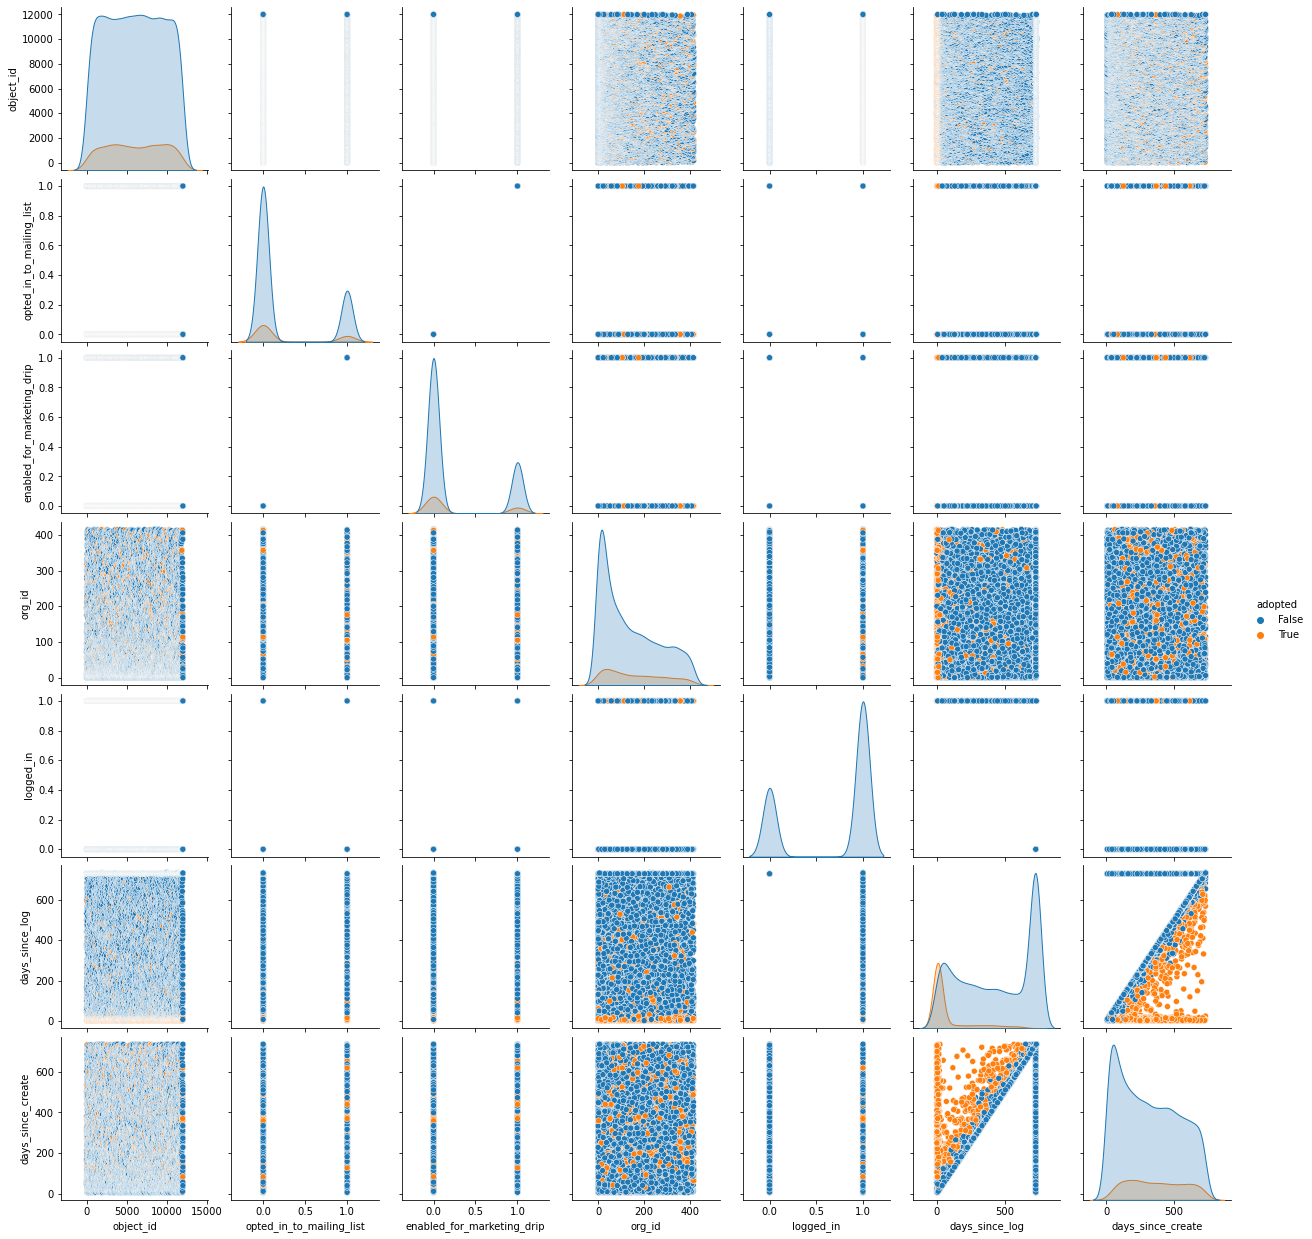

In [53]:
##Let's look at the pairwise correlations in a graphical format
sns.pairplot(data,hue='adopted')

<AxesSubplot:>

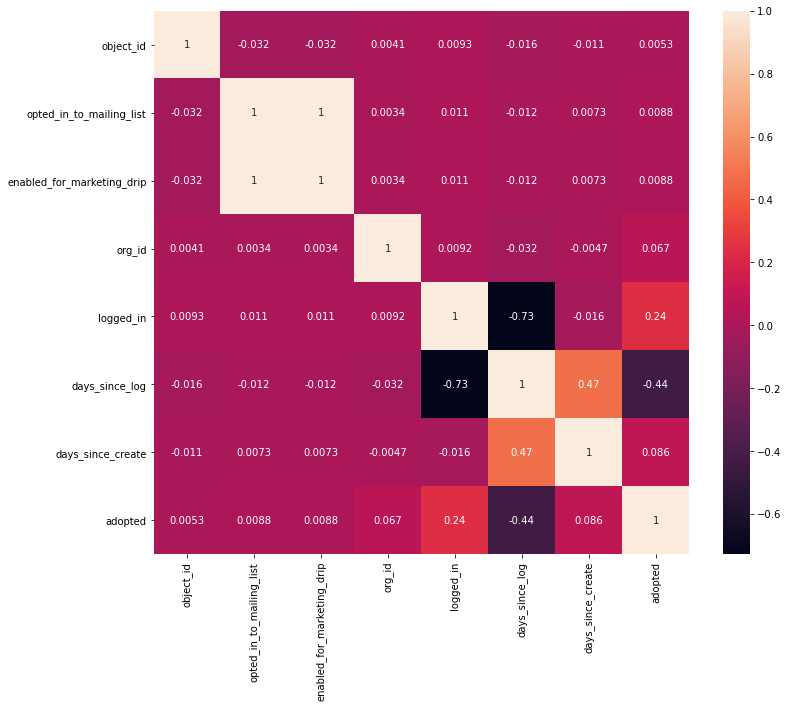

In [54]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

#There is high correlation between opted_in_to_mailing_list and enable_for_marketing_drip

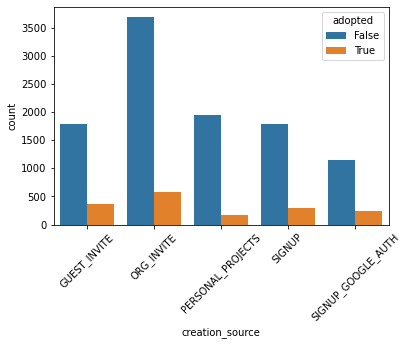

In [62]:
# Creation source and adopted user plot
_ = sns.countplot(x='creation_source', data=data, hue='adopted')
_ = plt.xticks(rotation=45)

In [57]:
#Check for adopted counts and % distribution, save as a dataframe
adopted =(data.adopted.value_counts()/12000*100)
adopted.head()

False    86.2
True     13.8
Name: adopted, dtype: float64

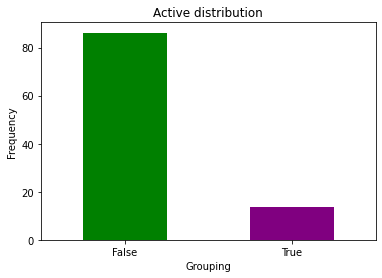

In [59]:
#Let's plot the prportiono of active riders in the past 30 days
#active =(df.active.value_counts()/50000*100), you can do this if you prefer not to have a seperate dataframe
adopted.plot(kind = 'bar',color=["Green", "purple"], rot=0)
plt.title("Active distribution")
plt.xlabel("Grouping")
plt.ylabel("Frequency");

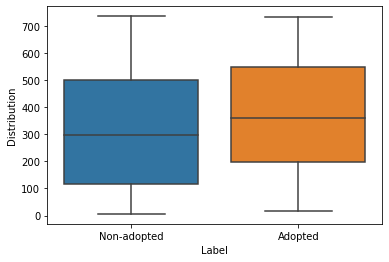

In [86]:

# How discriminative is days_since_create
sns.boxplot(data = [data[data.adopted == 0].days_since_create, data[data.adopted == 1].days_since_create])
plt.xticks((0,1),("Non-adopted", "Adopted"))
plt.xlabel('Label')
plt.ylabel('Distribution')
plt.show()

In [ ]:
There seem to be less adpoption, 13% which is very low. Overall adoption has been stable overtime

# Model and prediction of best predictors


In [63]:
#make dummy variable for creation source
creation_source = pd.get_dummies(data['creation_source'], drop_first=True)

In [65]:
data_model = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)

In [66]:
data_model.head()

,object_id,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in,days_since_log,days_since_create,adopted,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,Clausen August,AugustCClausen@yahoo.com,True,True,11,10803,True,45,45,False,0,0,0,0
1,2,Poole Matthew,MatthewPoole@gustr.com,False,False,1,316,True,67,203,True,1,0,0,0
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,False,False,94,1525,True,443,443,False,1,0,0,0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,False,False,1,5151,True,380,381,False,0,0,0,0
4,5,Raw Grace,GraceRaw@yahoo.com,False,False,193,5240,True,500,505,False,0,0,0,0


Let drop columns such as email and name for modelling. Email is highly correlated with enabled_for_marketing_drip. Have to drop one before building a model

In [71]:
modeldf=data_model.drop(['name','email', 'opted_in_to_mailing_list'],axis=1)


In [72]:
modeldf.head()

,object_id,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in,days_since_log,days_since_create,adopted,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,True,11,10803,True,45,45,False,0,0,0,0
1,2,False,1,316,True,67,203,True,1,0,0,0
2,3,False,94,1525,True,443,443,False,1,0,0,0
3,4,False,1,5151,True,380,381,False,0,0,0,0
4,5,False,193,5240,True,500,505,False,0,0,0,0


In [78]:
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   object_id                   12000 non-null  int64   
 1   enabled_for_marketing_drip  12000 non-null  bool    
 2   org_id                      12000 non-null  int64   
 3   invited_by_user_id          12000 non-null  category
 4   logged_in                   12000 non-null  bool    
 5   days_since_log              12000 non-null  int64   
 6   days_since_create           12000 non-null  int64   
 7   adopted                     12000 non-null  bool    
 8   ORG_INVITE                  12000 non-null  uint8   
 9   PERSONAL_PROJECTS           12000 non-null  uint8   
 10  SIGNUP                      12000 non-null  uint8   
 11  SIGNUP_GOOGLE_AUTH          12000 non-null  uint8   
dtypes: bool(3), category(1), int64(4), uint8(4)
memory usage: 580.6 KB


# Rndom forest model

In [81]:
#Creating x anf y data
y = modeldf['adopted']
X = modeldf.drop('adopted', axis=1)

In [82]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [98]:
# Create pipeline which includes Scaling and Random Forest, 
# Create a classifier using Cross-validated GridSearch for the best parameters

cv = 10
metric = "accuracy"
steps = [('scaler', StandardScaler()), 
         ('model', RandomForestClassifier(class_weight = 'balanced'))]
pipeline = Pipeline(steps)
parameters = {'model__n_estimators':[10 , 20, 30, 40, 50],
             'model__max_features': ['auto', 'sqrt', 'log2']}

rf = GridSearchCV(pipeline, 
                   parameters, 
                   n_jobs = -1,
                   cv = cv, 
                   scoring=metric,
                   verbose = 10)
rf.fit(Xtrain, ytrain)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   22.1s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=10)

In [100]:
# Evaluate
acc_score = accuracy_score(ytest, rf.predict(Xtest))
f1macro_score = f1_score(ytest, rf.predict(Xtest), average = "macro")
cm = confusion_matrix(ytest, rf.predict(Xtest))

print("The best parameters used was: ",rf.best_params_)
print("The Accuracy score is: ", round(acc_score, 3))
print("The F1 score is: ", round(f1macro_score, 3))
print("Confusion matrix: \n", cm)

The best parameters used was:  {'model__max_features': 'sqrt', 'model__n_estimators': 20}
The Accuracy score is:  0.958
The F1 score is:  0.905
Confusion matrix: 
 [[2557   29]
 [  97  317]]


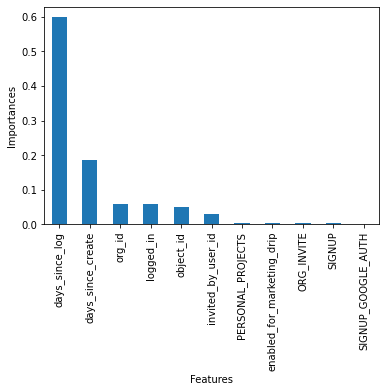

In [92]:
scaler = StandardScaler()

forest = RandomForestClassifier(n_estimators=10,
                                max_features = 'sqrt',
                               class_weight = 'balanced')

forest.fit(scaler.fit_transform(X), y)

importances = forest.feature_importances_

importances_df = pd.DataFrame.from_dict(dict(zip(X.columns, importances)), orient='index', columns = ["importances"])

importances_df.sort_values("importances", ascending = False).plot(kind = 'bar', legend = None)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.show()

Days since log in, days since create and the organization a user belongs to are important predictors of adoption.